In [19]:
import pandas as pd
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\sharm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\sharm\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

In [20]:
 
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
x_train[:10]
x_train.shape

(25000, 10000)

In [22]:
y_train.shape

(25000,)

In [23]:
array_new=np.hstack((x_train, np.atleast_2d(y_train).T))

In [24]:
array_new.shape

(25000, 10001)

In [25]:
df = pd.DataFrame(array_new)

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24996,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
number_of_rows = array_new.shape[0]
random_indices = np.random.choice(number_of_rows, size=number_of_rows//5, replace=False)
spliced_array_new = array_new[random_indices, :]

In [28]:
df2 = pd.DataFrame(spliced_array_new)

In [29]:
df2

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
df2.iloc[0]

0        0.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
9996     0.0
9997     0.0
9998     0.0
9999     0.0
10000    1.0
Name: 0, Length: 10001, dtype: float64

In [31]:
df3 = df2.iloc[:, x_train.shape[1]:]

In [32]:
df3.to_numpy()

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [33]:
df_x = df2.iloc[:, :x_train.shape[1]]

In [34]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt_1
import matplotlib.pyplot as plt_2
import matplotlib.pyplot as plt_3
import matplotlib.pyplot as plt_4
import keras
import tensorflow as tf
import sys
import os
import shutil

class mliiitl:
    '''
    Creates mliiitl object from all the user data
    '''
    def __init__(self, x_train, y_train, x_test, y_test, 
                 model, loss, epoch, batch_size):
        try:
            self._x_train = x_train
            self._y_train = y_train
            self._x_test = x_test
            self._y_test = y_test
            self._model = model
            self._loss = loss
            self._epoch = epoch
            self._batch_size = batch_size
        except Exception:
            try:
                print('Invalid arguments given in mliiitl.__init__()')
            except Exception:
                pass
            try:
                print('Invalid arguments given in mliiitl.__init__()', file = sys.stdout)
            except Exception:
                pass 
        

    def delete_model_instance(self):    #open bug: not working
        '''
        Deletes the temp_model
        '''
        print("hello")
        location = os.getcwd()
        folder = 'temp_model'
        path = os.path.join(location, folder)
        print(path)
        print("hello")
        try:
            shutil.rmtree(path)
        except Exception:
            print("Could not delete directory'temp_model',\
             Kindly delete the folder from current working directory.\
             May cause issues otherwise.")
            pass
    
    def save_output_model(arr_models, key):
        '''
        if save argument is True, save all trained models in the current working directory
        '''
        count = 1
        for model in arr_models:
            model.save('model_{model}'.format(model = key[count]))
            count += 1
        print('Models saved in {folder}'.format(folder = os.getcwd()))


    def save_model_instance(model):
        '''
        saves model (temp)
        '''
        model.save('temp_model')
        return 'temp_model'
    
    def splice_dataset_randomly(x_train, y_train, factor):
        '''
        splices 1/8th data randomly for training, or by any user specified factor
        '''
        if factor < 1:
            factor = 1
            print("Factor cannot be less than 1, defaulted to value 1")
        array_new = np.hstack((x_train, np.atleast_2d(y_train).T))
        number_of_rows = array_new.shape[0]
        random_indices = np.random.choice(number_of_rows, size=number_of_rows//factor, replace=False)
        spliced_array_new = array_new[random_indices, :]
        df = pd.DataFrame(spliced_array_new)
        df_y = df.iloc[:, x_train.shape[1]:]
        df_x = df.iloc[:, :x_train.shape[1]]
        spliced_y_train = df_y.to_numpy()
        spliced_x_train = df_x.to_numpy()
        return spliced_x_train,spliced_y_train
    
    def test_performance(self, plots = False, save = False, factor = 8):
        '''
        Compiles and train models on different optimisers
        '''
        temp = mliiitl.save_model_instance(self._model)
        spliced_x_train, spliced_y_train = mliiitl.splice_dataset_randomly(self._x_train, self._y_train, factor)
        model_sgd = tf.keras.models.load_model('temp_model')
        model_rmsprop = tf.keras.models.load_model('temp_model')
        model_adagrad = tf.keras.models.load_model('temp_model')
        model_adadelta = tf.keras.models.load_model('temp_model')
        model_adam = tf.keras.models.load_model('temp_model')
        model_ftrl = tf.keras.models.load_model('temp_model')
        model_nadam = tf.keras.models.load_model('temp_model')
        model_adamax = tf.keras.models.load_model('temp_model')

        validation = (self._x_test, self._y_test)

        model_sgd.compile(optimizer = 'SGD', loss = self._loss, metrics = ['acc'])
        history_sgd = model_sgd.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_rmsprop.compile(optimizer = 'RMSprop', loss = self._loss, metrics = ['acc'])
        history_rmsprop = model_rmsprop.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adagrad.compile(optimizer = 'Adagrad', loss = self._loss, metrics = ['acc'])
        history_adagrad = model_adagrad.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adadelta.compile(optimizer = 'Adadelta', loss = self._loss, metrics = ['acc'])
        history_adadelta = model_adagrad.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adam.compile(optimizer = 'adam', loss = self._loss, metrics = ['acc'])
        history_adam = model_adam.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_ftrl.compile(optimizer = 'Ftrl', loss = self._loss, metrics = ['acc'])
        history_ftrl = model_ftrl.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_nadam.compile(optimizer = 'Nadam', loss = self._loss, metrics = ['acc'])
        history_nadam = model_nadam.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adamax.compile(optimizer = 'Adamax', loss = self._loss, metrics = ['acc'])
        history_adamax = model_adamax.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)
        
        #mliiitl.delete_model_instance()
        output = [history_sgd, history_rmsprop, history_adagrad, history_adadelta, history_adam, history_ftrl, history_nadam, history_adamax]

        print("1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Ftrl', 7:'Nadam', 8:'Adamax'")
        key = {1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Ftrl', 7:'Nadam', 8:'Adamax'}

        if save:
            arr_models = [model_sgd, model_rmsprop, model_adagrad, model_adadelta, model_adam,
             model_ftrl, model_nadam, model_adamax]
            mliiitl.save_output_model(arr_models, key)

        if plots:
            mliiitl.get_plots(output)
            return output
        else:
            return output

    def get_plots(output):
        '''
        If passed True, outputs 4 plots to visualize the performances of different models with respective optimiser.
        '''
        key = {1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Ftrl', 7:'Nadam', 8:'Adamax'}
        count = 1
        for history in output:
            plt_1.plot(history.history['acc'], label = key[count])
            count += 1
        plt_1.title('Model Training Accuracy')
        plt_1.ylabel('Training Accuracy')
        plt_1.xlabel('Epoch(s)')
        plt_1.legend()
        plt_1.figure(figsize = (15,10))
        plt_1.show()
        
        count = 1
        for history in output:
            plt_2.plot(history.history['val_acc'], label = key[count])
            count += 1
        plt_2.title('Model Validation Accuracy')
        plt_2.ylabel('Validation Accuracy')
        plt_2.xlabel('Epoch(s)')
        plt_2.legend()
        plt_2.figure(figsize = (15,10))
        plt_2.show()

        count = 1
        for history in output:
            plt_3.plot(history.history['loss'], label = key[count])
            count += 1
        plt_3.title('Model Training Loss')
        plt_3.ylabel('Training Loss')
        plt_3.xlabel('Epoch(s)')
        plt_3.legend()
        plt_3.figure(figsize = (15,10))
        plt_3.show()

        count = 1
        for history in output:
            plt_4.plot(history.history['val_loss'], label = key[count])
            count += 1
        plt_4.title('Model Validation Loss')
        plt_4.ylabel('Validation Loss')
        plt_4.xlabel('Epoch(s)')
        plt_4.legend()
        plt_4.figure(figsize = (15,10))
        plt_4.show()
       




INFO:tensorflow:Assets written to: temp_model\assets
Epoch 1/20
25/25 [==============================] - 5s 142ms/step - loss: 0.6992 - acc: 0.5042 - val_loss: 0.6928 - val_acc: 0.5089
Epoch 2/20
25/25 [==============================] - 3s 114ms/step - loss: 0.6919 - acc: 0.5131 - val_loss: 0.6884 - val_acc: 0.5438
Epoch 3/20
25/25 [==============================] - 3s 117ms/step - loss: 0.6879 - acc: 0.5482 - val_loss: 0.6849 - val_acc: 0.5792
Epoch 4/20
25/25 [==============================] - 3s 113ms/step - loss: 0.6827 - acc: 0.5931 - val_loss: 0.6813 - val_acc: 0.6152
Epoch 5/20
25/25 [==============================] - 3s 123ms/step - loss: 0.6794 - acc: 0.6318 - val_loss: 0.6774 - val_acc: 0.6433
Epoch 6/20
25/25 [==============================] - 3s 123ms/step - loss: 0.6751 - acc: 0.6600 - val_loss: 0.6733 - val_acc: 0.6634
Epoch 7/20
25/25 [==============================] - 3s 132ms/step - loss: 0.6706 - acc: 0.6819 - val_loss: 0.6687 - val_acc: 0.6850
Epoch 8/20
25/25 [=====

Epoch 15/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6786 - acc: 0.6339 - val_loss: 0.6785 - val_acc: 0.6341
Epoch 16/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6776 - acc: 0.6397 - val_loss: 0.6773 - val_acc: 0.6427
Epoch 17/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6752 - acc: 0.6555 - val_loss: 0.6760 - val_acc: 0.6514
Epoch 18/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6735 - acc: 0.6632 - val_loss: 0.6747 - val_acc: 0.6592
Epoch 19/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6734 - acc: 0.6679 - val_loss: 0.6734 - val_acc: 0.6652
Epoch 20/20
25/25 [==============================] - 3s 109ms/step - loss: 0.6718 - acc: 0.6725 - val_loss: 0.6720 - val_acc: 0.6710
Epoch 1/20
25/25 [==============================] - 3s 143ms/step - loss: 0.6693 - acc: 0.6865 - val_loss: 0.6705 - val_acc: 0.6787
Epoch 2/20
25/25 [==============================] - 3s 114ms/step - lo

25/25 [==============================] - 3s 139ms/step - loss: 0.6931 - acc: 0.4984 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 17/20
25/25 [==============================] - 3s 141ms/step - loss: 0.6931 - acc: 0.5037 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 18/20
25/25 [==============================] - 3s 135ms/step - loss: 0.6931 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 19/20
25/25 [==============================] - 3s 132ms/step - loss: 0.6931 - acc: 0.4986 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 20/20
25/25 [==============================] - 4s 147ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 1/20
25/25 [==============================] - 7s 235ms/step - loss: 0.6111 - acc: 0.6658 - val_loss: 0.3365 - val_acc: 0.8672
Epoch 2/20
25/25 [==============================] - 4s 177ms/step - loss: 0.2124 - acc: 0.9243 - val_loss: 0.3042 - val_acc: 0.8762
Epoch 3/20
25/25 [==============================] - 4s 176ms/step - loss: 0.0733 - 

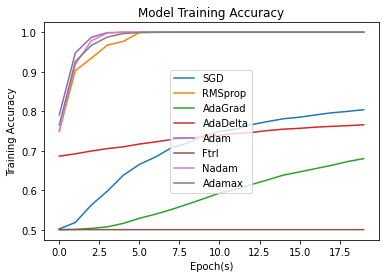

<Figure size 1080x720 with 0 Axes>

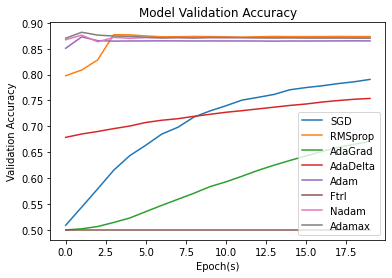

<Figure size 1080x720 with 0 Axes>

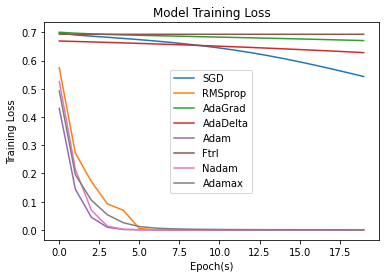

<Figure size 1080x720 with 0 Axes>

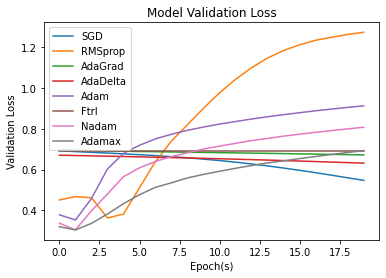

<Figure size 1080x720 with 0 Axes>

In [40]:



original_model = models.Sequential()
original_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(512, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

object_mliiitl = mliiitl(x_train, y_train,x_test,y_test,original_model,'binary_crossentropy',20,512)
object_mliiitl.test_performance(True, False, 2)

INFO:tensorflow:Assets written to: temp_model\assets
Epoch 1/20
25/25 [==============================] - 4s 142ms/step - loss: 0.6947 - acc: 0.4911 - val_loss: 0.6921 - val_acc: 0.5133
Epoch 2/20
25/25 [==============================] - 3s 108ms/step - loss: 0.6911 - acc: 0.5247 - val_loss: 0.6885 - val_acc: 0.5426
Epoch 3/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6871 - acc: 0.5546 - val_loss: 0.6849 - val_acc: 0.5723
Epoch 4/20
25/25 [==============================] - 3s 108ms/step - loss: 0.6824 - acc: 0.5914 - val_loss: 0.6811 - val_acc: 0.5988
Epoch 5/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6782 - acc: 0.6199 - val_loss: 0.6770 - val_acc: 0.6304
Epoch 6/20
25/25 [==============================] - 3s 106ms/step - loss: 0.6737 - acc: 0.6537 - val_loss: 0.6727 - val_acc: 0.6498
Epoch 7/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6683 - acc: 0.6698 - val_loss: 0.6678 - val_acc: 0.6759
Epoch 8/20
25/25 [=====

Epoch 15/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6769 - acc: 0.6345 - val_loss: 0.6782 - val_acc: 0.6206
Epoch 16/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6750 - acc: 0.6398 - val_loss: 0.6769 - val_acc: 0.6302
Epoch 17/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6741 - acc: 0.6518 - val_loss: 0.6755 - val_acc: 0.6376
Epoch 18/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6719 - acc: 0.6570 - val_loss: 0.6741 - val_acc: 0.6442
Epoch 19/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6711 - acc: 0.6642 - val_loss: 0.6727 - val_acc: 0.6512
Epoch 20/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6693 - acc: 0.6654 - val_loss: 0.6713 - val_acc: 0.6592
Epoch 1/20
25/25 [==============================] - 4s 151ms/step - loss: 0.6674 - acc: 0.6766 - val_loss: 0.6697 - val_acc: 0.6663
Epoch 2/20
25/25 [==============================] - 3s 124ms/step - lo

25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5060 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 17/20
25/25 [==============================] - 3s 134ms/step - loss: 0.6931 - acc: 0.5096 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 18/20
25/25 [==============================] - 3s 121ms/step - loss: 0.6932 - acc: 0.4969 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 19/20
25/25 [==============================] - 3s 120ms/step - loss: 0.6931 - acc: 0.5034 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 20/20
25/25 [==============================] - 3s 118ms/step - loss: 0.6931 - acc: 0.5038 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 1/20
25/25 [==============================] - 5s 198ms/step - loss: 0.6005 - acc: 0.6459 - val_loss: 0.3544 - val_acc: 0.8482
Epoch 2/20
25/25 [==============================] - 4s 161ms/step - loss: 0.2154 - acc: 0.9232 - val_loss: 0.3157 - val_acc: 0.8671
Epoch 3/20
25/25 [==============================] - 4s 160ms/step - loss: 0.0690 - 

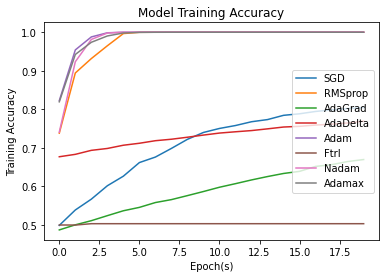

<Figure size 1080x720 with 0 Axes>

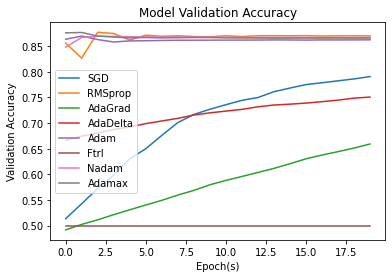

<Figure size 1080x720 with 0 Axes>

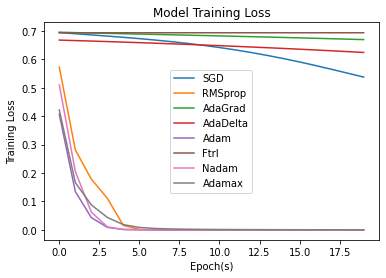

<Figure size 1080x720 with 0 Axes>

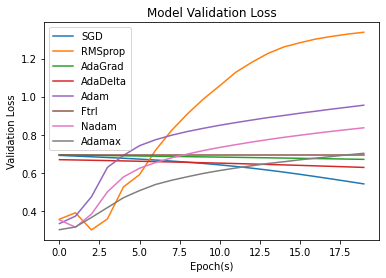

<Figure size 1080x720 with 0 Axes>

In [42]:





original_model = models.Sequential()
original_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(512, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

object_mliiitl = mliiitl(x_train, y_train,x_test,y_test,original_model,'binary_crossentropy',20,512)
object_mliiitl.test_performance(True, False, 2)

INFO:tensorflow:Assets written to: temp_model\assets
Epoch 1/20
25/25 [==============================] - 4s 143ms/step - loss: 0.6996 - acc: 0.5044 - val_loss: 0.6942 - val_acc: 0.5024
Epoch 2/20
25/25 [==============================] - 3s 109ms/step - loss: 0.6933 - acc: 0.5095 - val_loss: 0.6898 - val_acc: 0.5286
Epoch 3/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6889 - acc: 0.5415 - val_loss: 0.6860 - val_acc: 0.5622
Epoch 4/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6850 - acc: 0.5783 - val_loss: 0.6823 - val_acc: 0.5958
Epoch 5/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6797 - acc: 0.6165 - val_loss: 0.6783 - val_acc: 0.6332
Epoch 6/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6753 - acc: 0.6470 - val_loss: 0.6741 - val_acc: 0.6636
Epoch 7/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6715 - acc: 0.6785 - val_loss: 0.6694 - val_acc: 0.6839
Epoch 8/20
25/25 [=====

Epoch 15/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6796 - acc: 0.6195 - val_loss: 0.6794 - val_acc: 0.6208
Epoch 16/20
25/25 [==============================] - 3s 109ms/step - loss: 0.6775 - acc: 0.6318 - val_loss: 0.6781 - val_acc: 0.6307
Epoch 17/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6766 - acc: 0.6322 - val_loss: 0.6768 - val_acc: 0.6396
Epoch 18/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6745 - acc: 0.6501 - val_loss: 0.6755 - val_acc: 0.6496
Epoch 19/20
25/25 [==============================] - 3s 115ms/step - loss: 0.6741 - acc: 0.6514 - val_loss: 0.6741 - val_acc: 0.6576
Epoch 20/20
25/25 [==============================] - 3s 114ms/step - loss: 0.6723 - acc: 0.6675 - val_loss: 0.6727 - val_acc: 0.6666
Epoch 1/20
25/25 [==============================] - 4s 147ms/step - loss: 0.6702 - acc: 0.6810 - val_loss: 0.6712 - val_acc: 0.6742
Epoch 2/20
25/25 [==============================] - 3s 119ms/step - lo

25/25 [==============================] - 3s 120ms/step - loss: 0.6931 - acc: 0.5073 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 17/20
25/25 [==============================] - 3s 120ms/step - loss: 0.6931 - acc: 0.5047 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 18/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 19/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5032 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 20/20
25/25 [==============================] - 3s 118ms/step - loss: 0.6931 - acc: 0.5073 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 1/20
25/25 [==============================] - 7s 270ms/step - loss: 0.6066 - acc: 0.6609 - val_loss: 0.5381 - val_acc: 0.7506
Epoch 2/20
25/25 [==============================] - 4s 163ms/step - loss: 0.2423 - acc: 0.9039 - val_loss: 0.2964 - val_acc: 0.8790
Epoch 3/20
25/25 [==============================] - 4s 163ms/step - loss: 0.0721 - 

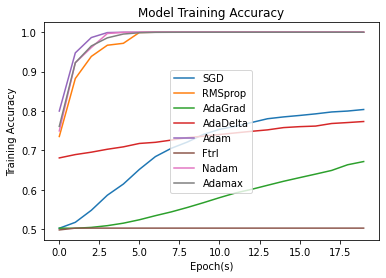

<Figure size 1080x720 with 0 Axes>

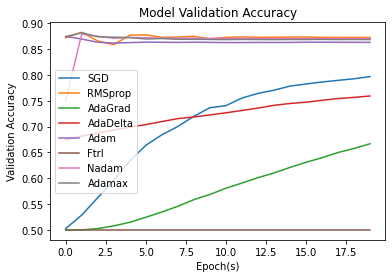

<Figure size 1080x720 with 0 Axes>

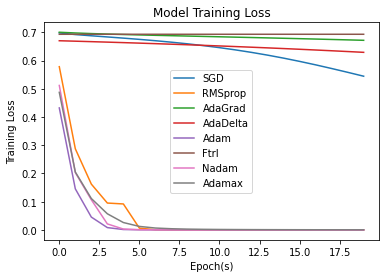

<Figure size 1080x720 with 0 Axes>

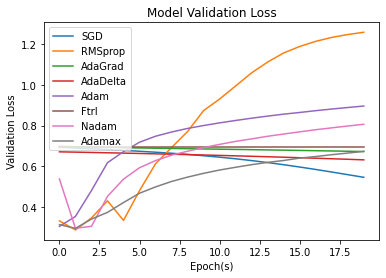

<Figure size 1080x720 with 0 Axes>

In [43]:



original_model = models.Sequential()
original_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(512, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

object_mliiitl = mliiitl(x_train, y_train,x_test,y_test,original_model,'binary_crossentropy',20,512)
object_mliiitl.test_performance(True, False, 2)

INFO:tensorflow:Assets written to: temp_model\assets
Epoch 1/20
25/25 [==============================] - 3s 128ms/step - loss: 0.6916 - acc: 0.5264 - val_loss: 0.6902 - val_acc: 0.5427
Epoch 2/20
25/25 [==============================] - 3s 109ms/step - loss: 0.6885 - acc: 0.5546 - val_loss: 0.6871 - val_acc: 0.5760
Epoch 3/20
25/25 [==============================] - 3s 106ms/step - loss: 0.6847 - acc: 0.6012 - val_loss: 0.6840 - val_acc: 0.6039
Epoch 4/20
25/25 [==============================] - 3s 106ms/step - loss: 0.6819 - acc: 0.6210 - val_loss: 0.6806 - val_acc: 0.6340
Epoch 5/20
25/25 [==============================] - 3s 105ms/step - loss: 0.6774 - acc: 0.6595 - val_loss: 0.6770 - val_acc: 0.6577
Epoch 6/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6732 - acc: 0.6863 - val_loss: 0.6730 - val_acc: 0.6785
Epoch 7/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6687 - acc: 0.7086 - val_loss: 0.6687 - val_acc: 0.6953
Epoch 8/20
25/25 [=====

Epoch 15/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6769 - acc: 0.6657 - val_loss: 0.6779 - val_acc: 0.6517
Epoch 16/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6750 - acc: 0.6756 - val_loss: 0.6768 - val_acc: 0.6588
Epoch 17/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6738 - acc: 0.6826 - val_loss: 0.6755 - val_acc: 0.6654
Epoch 18/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6725 - acc: 0.6848 - val_loss: 0.6743 - val_acc: 0.6720
Epoch 19/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6711 - acc: 0.6923 - val_loss: 0.6730 - val_acc: 0.6788
Epoch 20/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6694 - acc: 0.7002 - val_loss: 0.6717 - val_acc: 0.6852
Epoch 1/20
25/25 [==============================] - 5s 197ms/step - loss: 0.6681 - acc: 0.7051 - val_loss: 0.6703 - val_acc: 0.6900
Epoch 2/20
25/25 [==============================] - 3s 115ms/step - lo

25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5077 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 17/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5053 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 18/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5051 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 19/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5022 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 20/20
25/25 [==============================] - 3s 118ms/step - loss: 0.6932 - acc: 0.4991 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 1/20
25/25 [==============================] - 6s 206ms/step - loss: 0.6025 - acc: 0.6591 - val_loss: 0.3144 - val_acc: 0.8771
Epoch 2/20
25/25 [==============================] - 4s 160ms/step - loss: 0.2083 - acc: 0.9244 - val_loss: 0.3010 - val_acc: 0.8795
Epoch 3/20
25/25 [==============================] - 4s 160ms/step - loss: 0.0873 - 

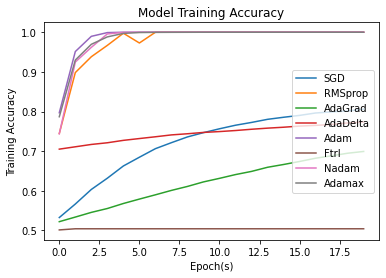

<Figure size 1080x720 with 0 Axes>

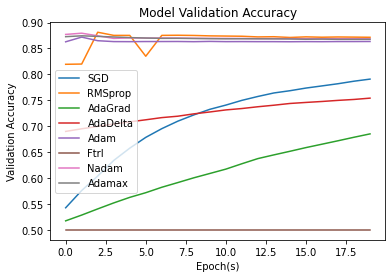

<Figure size 1080x720 with 0 Axes>

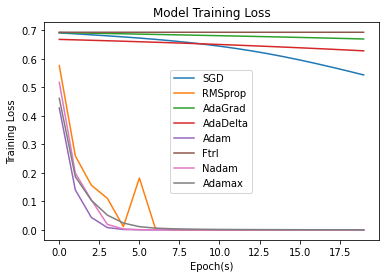

<Figure size 1080x720 with 0 Axes>

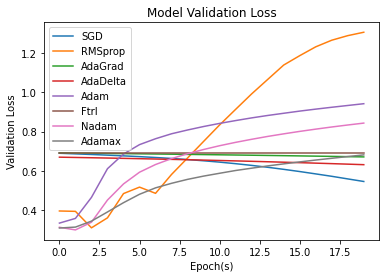

<Figure size 1080x720 with 0 Axes>

In [44]:



original_model = models.Sequential()
original_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(512, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

object_mliiitl = mliiitl(x_train, y_train,x_test,y_test,original_model,'binary_crossentropy',20,512)
object_mliiitl.test_performance(True, False, 2)

INFO:tensorflow:Assets written to: temp_model\assets
Epoch 1/20
25/25 [==============================] - 7s 140ms/step - loss: 0.6952 - acc: 0.4990 - val_loss: 0.6924 - val_acc: 0.5139
Epoch 2/20
25/25 [==============================] - 3s 105ms/step - loss: 0.6910 - acc: 0.5265 - val_loss: 0.6890 - val_acc: 0.5481
Epoch 3/20
25/25 [==============================] - 3s 106ms/step - loss: 0.6873 - acc: 0.5644 - val_loss: 0.6856 - val_acc: 0.5846
Epoch 4/20
25/25 [==============================] - 3s 106ms/step - loss: 0.6836 - acc: 0.5999 - val_loss: 0.6820 - val_acc: 0.6163
Epoch 5/20
25/25 [==============================] - 3s 105ms/step - loss: 0.6796 - acc: 0.6373 - val_loss: 0.6782 - val_acc: 0.6437
Epoch 6/20
25/25 [==============================] - 3s 107ms/step - loss: 0.6749 - acc: 0.6646 - val_loss: 0.6741 - val_acc: 0.6698
Epoch 7/20
25/25 [==============================] - 3s 105ms/step - loss: 0.6703 - acc: 0.6858 - val_loss: 0.6696 - val_acc: 0.6921
Epoch 8/20
25/25 [=====

Epoch 15/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6781 - acc: 0.6457 - val_loss: 0.6793 - val_acc: 0.6398
Epoch 16/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6767 - acc: 0.6581 - val_loss: 0.6781 - val_acc: 0.6484
Epoch 17/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6758 - acc: 0.6623 - val_loss: 0.6768 - val_acc: 0.6560
Epoch 18/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6746 - acc: 0.6708 - val_loss: 0.6755 - val_acc: 0.6632
Epoch 19/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6727 - acc: 0.6791 - val_loss: 0.6742 - val_acc: 0.6706
Epoch 20/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6714 - acc: 0.6887 - val_loss: 0.6728 - val_acc: 0.6778
Epoch 1/20
25/25 [==============================] - 3s 127ms/step - loss: 0.6695 - acc: 0.6982 - val_loss: 0.6714 - val_acc: 0.6838
Epoch 2/20
25/25 [==============================] - 3s 110ms/step - lo

25/25 [==============================] - 3s 120ms/step - loss: 0.6931 - acc: 0.5026 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 17/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5044 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 18/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6932 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 19/20
25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 20/20
25/25 [==============================] - 3s 118ms/step - loss: 0.6931 - acc: 0.5038 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 1/20
25/25 [==============================] - 7s 270ms/step - loss: 0.6054 - acc: 0.6569 - val_loss: 0.3174 - val_acc: 0.8752
Epoch 2/20
25/25 [==============================] - 4s 165ms/step - loss: 0.2029 - acc: 0.9317 - val_loss: 0.3081 - val_acc: 0.8740
Epoch 3/20
25/25 [==============================] - 4s 167ms/step - loss: 0.0749 - 

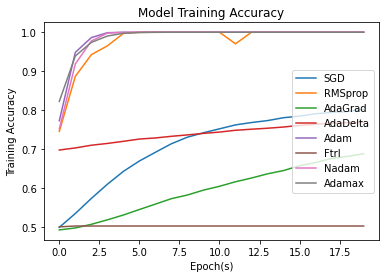

<Figure size 1080x720 with 0 Axes>

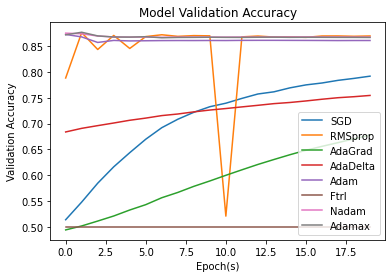

<Figure size 1080x720 with 0 Axes>

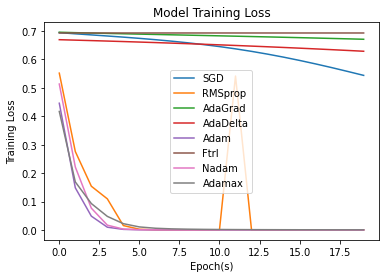

<Figure size 1080x720 with 0 Axes>

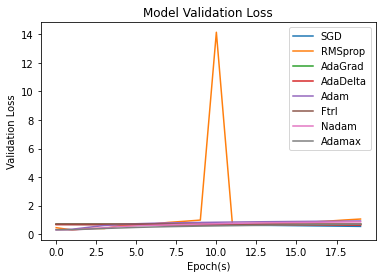

<Figure size 1080x720 with 0 Axes>

In [45]:



original_model = models.Sequential()
original_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(512, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

object_mliiitl = mliiitl(x_train, y_train,x_test,y_test,original_model,'binary_crossentropy',20,512)
object_mliiitl.test_performance(True, False, 2)

INFO:tensorflow:Assets written to: temp_model\assets
Epoch 1/20
25/25 [==============================] - 4s 149ms/step - loss: 0.6947 - acc: 0.4964 - val_loss: 0.6920 - val_acc: 0.5170
Epoch 2/20
25/25 [==============================] - 3s 113ms/step - loss: 0.6903 - acc: 0.5273 - val_loss: 0.6884 - val_acc: 0.5497
Epoch 3/20
25/25 [==============================] - 3s 116ms/step - loss: 0.6861 - acc: 0.5705 - val_loss: 0.6847 - val_acc: 0.5838
Epoch 4/20
25/25 [==============================] - 3s 112ms/step - loss: 0.6827 - acc: 0.5955 - val_loss: 0.6807 - val_acc: 0.6160
Epoch 5/20
25/25 [==============================] - 3s 112ms/step - loss: 0.6773 - acc: 0.6460 - val_loss: 0.6765 - val_acc: 0.6388
Epoch 6/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6728 - acc: 0.6626 - val_loss: 0.6718 - val_acc: 0.6660
Epoch 7/20
25/25 [==============================] - 3s 116ms/step - loss: 0.6671 - acc: 0.6923 - val_loss: 0.6666 - val_acc: 0.6882
Epoch 8/20
25/25 [=====

Epoch 15/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6765 - acc: 0.6437 - val_loss: 0.6777 - val_acc: 0.6305
Epoch 16/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6753 - acc: 0.6511 - val_loss: 0.6763 - val_acc: 0.6386
Epoch 17/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6733 - acc: 0.6621 - val_loss: 0.6749 - val_acc: 0.6462
Epoch 18/20
25/25 [==============================] - 3s 111ms/step - loss: 0.6718 - acc: 0.6690 - val_loss: 0.6734 - val_acc: 0.6549
Epoch 19/20
25/25 [==============================] - 3s 112ms/step - loss: 0.6700 - acc: 0.6779 - val_loss: 0.6719 - val_acc: 0.6626
Epoch 20/20
25/25 [==============================] - 3s 110ms/step - loss: 0.6687 - acc: 0.6782 - val_loss: 0.6703 - val_acc: 0.6710
Epoch 1/20
25/25 [==============================] - 9s 366ms/step - loss: 0.6662 - acc: 0.6936 - val_loss: 0.6687 - val_acc: 0.6786
Epoch 2/20
25/25 [==============================] - 3s 114ms/step - lo

25/25 [==============================] - 3s 119ms/step - loss: 0.6931 - acc: 0.5061 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 17/20
25/25 [==============================] - 3s 123ms/step - loss: 0.6931 - acc: 0.5005 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 18/20
25/25 [==============================] - 3s 120ms/step - loss: 0.6932 - acc: 0.4957 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 19/20
25/25 [==============================] - 3s 120ms/step - loss: 0.6931 - acc: 0.5031 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 20/20
25/25 [==============================] - 3s 118ms/step - loss: 0.6932 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 1/20
25/25 [==============================] - 6s 203ms/step - loss: 0.6000 - acc: 0.6465 - val_loss: 0.5053 - val_acc: 0.7592
Epoch 2/20
25/25 [==============================] - 4s 161ms/step - loss: 0.2097 - acc: 0.9294 - val_loss: 0.5085 - val_acc: 0.7916
Epoch 3/20
25/25 [==============================] - 4s 160ms/step - loss: 0.1054 - 

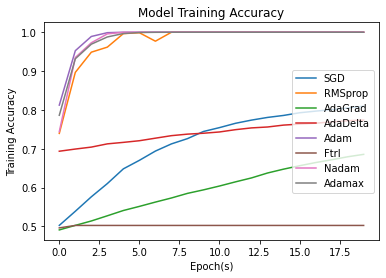

<Figure size 1080x720 with 0 Axes>

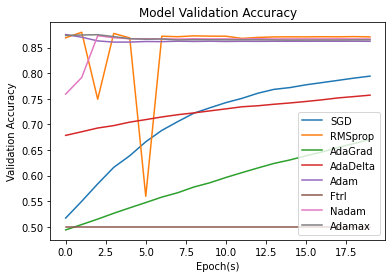

<Figure size 1080x720 with 0 Axes>

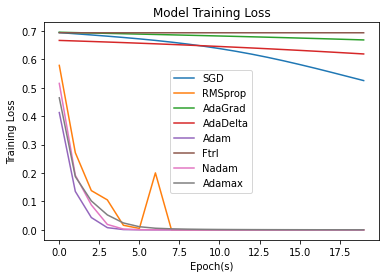

<Figure size 1080x720 with 0 Axes>

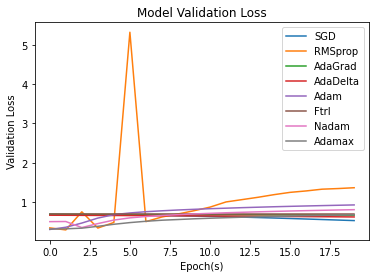

<Figure size 1080x720 with 0 Axes>

In [46]:



original_model = models.Sequential()
original_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(512, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

object_mliiitl = mliiitl(x_train, y_train,x_test,y_test,original_model,'binary_crossentropy',20,512)
object_mliiitl.test_performance(True, False, 2)